## Importing Important libraries

In [1]:
import pandas as pd
import numpy as np

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

## 1. Problem statement

## 2. Data Gatharing

In [2]:
dataset = pd.read_csv("titanic.csv")
dataset.head()

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Gender       888 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## EDA (Exploratory data analysis)

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Gender       888 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
dataset.drop(["PassengerId", "Name", "Ticket", "Cabin"], axis=1, inplace=True)

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Gender    888 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [7]:
dataset["Survived"].isna().sum()

0

In [8]:
# 547 people were dead
# 344 people were survied
dataset["Survived"].value_counts()

0    547
1    344
Name: Survived, dtype: int64

<AxesSubplot:xlabel='Survived', ylabel='count'>

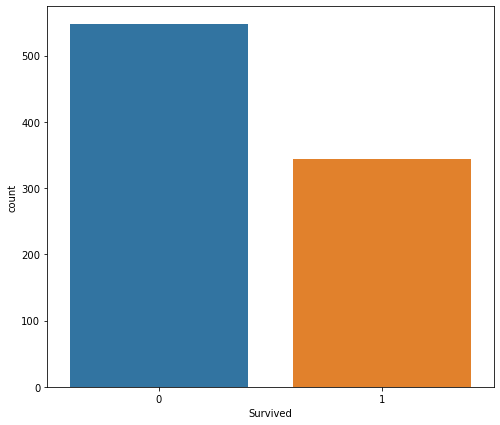

In [9]:
plt.figure(figsize=(8,7),facecolor="white")
sns.countplot(data=dataset, x="Survived")

<AxesSubplot:xlabel='Survived', ylabel='count'>

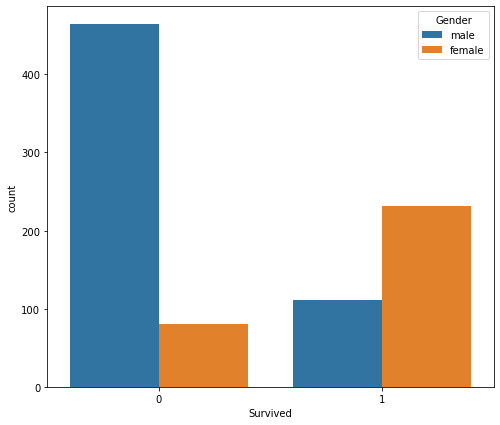

In [10]:
## Class 0 :- it shows how many total people's we on the board
## Class 1 :- How many people were survered 
plt.figure(figsize=(8,7),facecolor="white")
sns.countplot(data=dataset, x="Survived", hue="Gender")

# Form the bellow graph we can see that the count of the men was higher than the count of the female's
# but only the proportion lf survied men was low and the proportion of survied class of feamale was high

<AxesSubplot:xlabel='Survived', ylabel='count'>

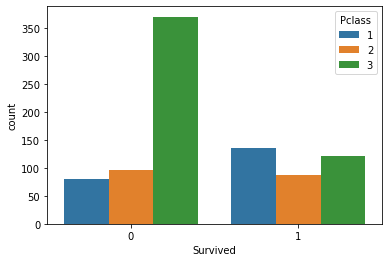

In [11]:
sns.countplot(data=dataset, x="Survived", hue="Pclass")

In [12]:
dataset.isna().sum()

Survived      0
Pclass        0
Gender        3
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

<AxesSubplot:>

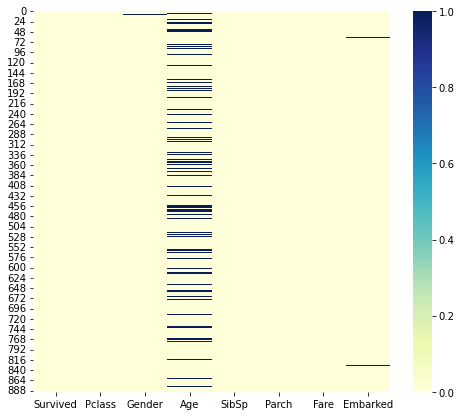

In [13]:
plt.figure(figsize=(8,7),facecolor="white")

sns.heatmap(dataset.isna(),cmap = 'YlGnBu')

In [14]:
dataset["Age"].fillna(dataset["Age"].median(), inplace=True)

In [15]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Gender    888 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [16]:
dataset.isnull().sum()

Survived    0
Pclass      0
Gender      3
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64

In [17]:
dataset["Gender"].replace({"male": 0, "female": 1}, inplace=True)

In [18]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Gender    888 non-null    float64
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(3), int64(4), object(1)
memory usage: 55.8+ KB


In [19]:
# in Gender column we replace that value by intiger but it seems it converts in  float datatype. 
# the reason behind it is Gender columns had some missing values.
dataset.head()

,Survived,Pclass,Gender,Age,SibSp,Parch,Fare,Embarked
0,0,3,0.0,22.0,1,0,7.2500,S
1,1,1,1.0,38.0,1,0,71.2833,C
2,1,3,1.0,26.0,0,0,7.9250,S
3,1,1,1.0,35.0,1,0,53.1000,S
4,0,3,0.0,35.0,0,0,8.0500,S


In [20]:
dataset.isna().sum()

Survived    0
Pclass      0
Gender      3
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64

In [21]:
dataset.Gender.mode()[0]

0.0

In [22]:
dataset['Gender'].fillna(dataset['Gender'].mode()[0], inplace=True)

In [23]:
dataset.isna().sum()

Survived    0
Pclass      0
Gender      0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64

In [24]:
embarked_df = pd.get_dummies(dataset["Embarked"], drop_first=True)

In [25]:
embarked_df.head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [26]:
df = pd.concat([dataset, embarked_df], axis=1)

In [27]:
df.drop(["Embarked"], axis=1, inplace=True)

In [28]:
df.head()

,Survived,Pclass,Gender,Age,SibSp,Parch,Fare,Q,S
0,0,3,0.0,22.0,1,0,7.2500,0,1
1,1,1,1.0,38.0,1,0,71.2833,0,0
2,1,3,1.0,26.0,0,0,7.9250,0,1
3,1,1,1.0,35.0,1,0,53.1000,0,1
4,0,3,0.0,35.0,0,0,8.0500,0,1


In [29]:
df.isna().sum()

Survived    0
Pclass      0
Gender      0
Age         0
SibSp       0
Parch       0
Fare        0
Q           0
S           0
dtype: int64

## Model Training

#### spliting data

In [30]:
x = df.drop("Survived", axis=1)
y = df["Survived"]

In [31]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=1, stratify=y)

##### if stratify = y
###### stratify maintains the balance the data that goes into the test and y dataset . i.e the data in y and y_test will equally be distributed


In [32]:
y_test.value_counts()

0    110
1     69
Name: Survived, dtype: int64

In [33]:
69/110

0.6272727272727273

In [34]:
y.value_counts()

0    547
1    344
Name: Survived, dtype: int64

In [35]:
344/547

0.6288848263254113

##### if stratify = None

In [36]:
y_test.value_counts()

0    110
1     69
Name: Survived, dtype: int64

In [37]:
74/105

0.7047619047619048

In [38]:
y.value_counts()

0    547
1    344
Name: Survived, dtype: int64

In [39]:
344/547

0.6288848263254113

### Applying logistic regression

In [40]:
classifier = LogisticRegression()
classifier.fit(x_test, y_test)

LogisticRegression()

#### 1. test set predictions

In [41]:
y_pred_test = classifier.predict(x_test)

In [42]:
y_pred_test[10:15]

array([0, 0, 1, 0, 1], dtype=int64)

In [43]:
y_test[10:15]

355    0
388    0
299    1
77     0
607    1
Name: Survived, dtype: int64

In [44]:
y_pred_test[:10]

array([0, 0, 0, 0, 0, 1, 1, 1, 0, 0], dtype=int64)

In [45]:
y_test[:10]

200    0
812    0
825    0
50     0
286    1
394    1
437    1
230    1
684    0
23     1
Name: Survived, dtype: int64

# Accuracy

In [46]:
Accuracy = accuracy_score(y_test, y_pred_test)
Accuracy

0.8100558659217877

In [47]:
matrix = confusion_matrix(y_test, y_pred_test)
matrix

array([[96, 14],
       [20, 49]], dtype=int64)

In [48]:
(96+49) / (96+20+49+14)

0.8100558659217877

#### Classification Report

In [49]:
clf_report = classification_report(y_test, y_pred_test)
print(clf_report)

              precision    recall  f1-score   support

           0       0.83      0.87      0.85       110
           1       0.78      0.71      0.74        69

    accuracy                           0.81       179
   macro avg       0.80      0.79      0.80       179
weighted avg       0.81      0.81      0.81       179



In [50]:
y_test_prob = classifier.predict_proba(x_test)

In [51]:
y_test_prob

array([[0.90296168, 0.09703832],
       [0.82737112, 0.17262888],
       [0.86984198, 0.13015802],
       [0.79426396, 0.20573604],
       [0.9133834 , 0.0866166 ],
       [0.35432954, 0.64567046],
       [0.17514725, 0.82485275],
       [0.15173829, 0.84826171],
       [0.96067342, 0.03932658],
       [0.51473871, 0.48526129],
       [0.90296168, 0.09703832],
       [0.86995574, 0.13004426],
       [0.2709963 , 0.7290037 ],
       [0.90279768, 0.09720232],
       [0.49749438, 0.50250562],
       [0.74459197, 0.25540803],
       [0.98543927, 0.01456073],
       [0.41067295, 0.58932705],
       [0.33987047, 0.66012953],
       [0.45681533, 0.54318467],
       [0.0621825 , 0.9378175 ],
       [0.41652572, 0.58347428],
       [0.93341697, 0.06658303],
       [0.63357342, 0.36642658],
       [0.83822893, 0.16177107],
       [0.97505826, 0.02494174],
       [0.883441  , 0.116559  ],
       [0.81452254, 0.18547746],
       [0.18358613, 0.81641387],
       [0.14480704, 0.85519296],
       [0.

In [52]:
y_test_prob[:,1]

array([0.09703832, 0.17262888, 0.13015802, 0.20573604, 0.0866166 ,
       0.64567046, 0.82485275, 0.84826171, 0.03932658, 0.48526129,
       0.09703832, 0.13004426, 0.7290037 , 0.09720232, 0.50250562,
       0.25540803, 0.01456073, 0.58932705, 0.66012953, 0.54318467,
       0.9378175 , 0.58347428, 0.06658303, 0.36642658, 0.16177107,
       0.02494174, 0.116559  , 0.18547746, 0.81641387, 0.85519296,
       0.11364151, 0.94000907, 0.07736333, 0.45083894, 0.94271361,
       0.86343208, 0.91624464, 0.58881256, 0.20956403, 0.84466016,
       0.10754923, 0.13004123, 0.90021574, 0.17914689, 0.07732306,
       0.47417043, 0.09721978, 0.91394171, 0.74345766, 0.54561801,
       0.46270154, 0.11024615, 0.81853018, 0.38515272, 0.95538421,
       0.40330377, 0.14290322, 0.16149049, 0.58538447, 0.9564865 ,
       0.90396221, 0.08620034, 0.83734941, 0.76841957, 0.70949019,
       0.82780925, 0.13549353, 0.03179832, 0.05134208, 0.13559113,
       0.08617494, 0.27991485, 0.59301589, 0.09640722, 0.08225

In [53]:
fpr,tpr,thresh = roc_curve(y_test, y_test_prob[:,1])

In [54]:
print(fpr, len(fpr))

[0.         0.         0.         0.00909091 0.00909091 0.01818182
 0.01818182 0.03636364 0.03636364 0.04545455 0.04545455 0.05454545
 0.05454545 0.06363636 0.06363636 0.10909091 0.10909091 0.12727273
 0.12727273 0.13636364 0.14545455 0.14545455 0.14545455 0.15454545
 0.15454545 0.2        0.2        0.20909091 0.20909091 0.23636364
 0.23636364 0.37272727 0.37272727 0.42727273 0.42727273 0.48181818
 0.48181818 0.55454545 0.55454545 0.56363636 0.58181818 0.61818182
 0.63636364 0.64545455 0.64545455 0.67272727 0.67272727 0.70909091
 0.70909091 0.72727273 0.76363636 0.78181818 0.8        0.81818182
 0.82727273 0.82727273 0.85454545 0.86363636 1.        ] 59


In [55]:
print(tpr, len(fpr))

[0.         0.01449275 0.42028986 0.42028986 0.43478261 0.43478261
 0.55072464 0.55072464 0.57971014 0.57971014 0.62318841 0.62318841
 0.65217391 0.65217391 0.66666667 0.66666667 0.68115942 0.68115942
 0.72463768 0.72463768 0.73913043 0.76811594 0.7826087  0.7826087
 0.79710145 0.79710145 0.82608696 0.82608696 0.84057971 0.84057971
 0.85507246 0.85507246 0.86956522 0.86956522 0.88405797 0.88405797
 0.89855072 0.89855072 0.91304348 0.91304348 0.91304348 0.91304348
 0.91304348 0.91304348 0.92753623 0.92753623 0.94202899 0.94202899
 0.95652174 0.95652174 0.95652174 0.95652174 0.95652174 0.97101449
 0.97101449 0.98550725 0.98550725 1.         1.        ] 59


In [56]:
print(thresh, len(thresh))

[1.95712172 0.95712172 0.81641387 0.81246116 0.77030509 0.76841957
 0.68296456 0.66012953 0.63386343 0.62727721 0.60068659 0.59612593
 0.58932705 0.58881256 0.58854487 0.55326456 0.54561801 0.54318467
 0.49617963 0.49021825 0.48814539 0.48526129 0.47417043 0.47391062
 0.46473333 0.38515272 0.37375703 0.36790258 0.36642658 0.27991485
 0.2697284  0.20109345 0.18570492 0.1703077  0.16752734 0.1590117
 0.15898511 0.13731264 0.13583125 0.13559113 0.13549353 0.13004426
 0.13004123 0.1299379  0.12312771 0.11364151 0.11264434 0.10754923
 0.10286112 0.09721978 0.09720232 0.09703832 0.09320646 0.09185489
 0.0870278  0.0866166  0.08225271 0.07736333 0.01351496] 59


Text(0, 0.5, 'TPR')

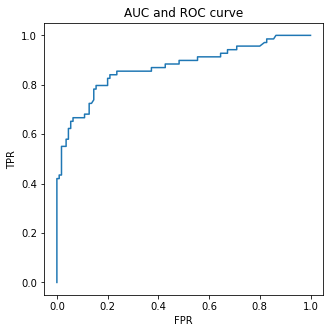

In [57]:
## ROC-AUC Curve
plt.figure(figsize=(5,5),facecolor="white")
plt.title("AUC and ROC curve")
plt.plot(fpr,tpr)
plt.xlabel("FPR")
plt.ylabel("TPR")

In [58]:
roc_auc_score(y_test, y_test_prob[:,1])

0.8700922266139657

In [92]:
x_test.head(10)

,Pclass,Gender,Age,SibSp,Parch,Fare,Q,S
200,3,0.0,28.0,0,0,9.5000,0,1
812,2,0.0,35.0,0,0,10.5000,0,1
825,3,0.0,28.0,0,0,6.9500,1,0
50,3,0.0,7.0,4,1,39.6875,0,1
286,3,0.0,30.0,0,0,9.5000,0,1
394,3,1.0,24.0,0,2,16.7000,0,1
437,2,1.0,24.0,2,3,18.7500,0,1
230,1,1.0,35.0,1,0,83.4750,0,1
684,2,0.0,60.0,1,1,39.0000,0,1
23,1,0.0,28.0,0,0,35.5000,0,1


In [91]:
classifier.predict(x_test.iloc[7:8])

array([1], dtype=int64)

In [87]:
x_test.columns

Index(['Pclass', 'Gender', 'Age', 'SibSp', 'Parch', 'Fare', 'Q', 'S'], dtype='object')

In [88]:
def predict_cls(Pclass,Gender,Age,SibSp,Parch,Fare,Q,S):
    pred = classifier.predict([[Pclass, Gender, Age, SibSp, Parch, Fare, Q, S]])
    return pred[0]
predict_cls(3,0,25,0,1,10,1,0)

0

In [89]:
classifier.predict(x_test.head())

array([0, 0, 0, 0, 0], dtype=int64)

In [90]:
import pickle
import os
MODEL_FOLDER_PATH = "model"

if not os.path.exists(MODEL_FOLDER_PATH):
    os.mkdir(MODEL_FOLDER_PATH)
pickle.dump(classifier, open(f"{MODEL_FOLDER_PATH}/model.pkl", "wb"))